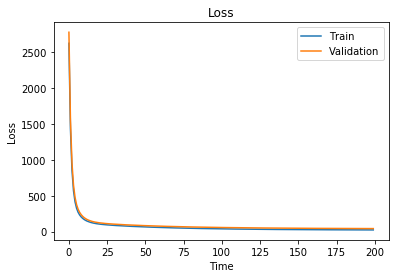

In [8]:
# -*- coding: UTF-8 -*-
from sklearn.datasets import load_svmlight_file
from numpy import *
import numpy as np
from sklearn.model_selection import train_test_split
from math import ceil
import matplotlib.pyplot as plt

def get_data(s):
    data = load_svmlight_file(s)
    return data[0], data[1]
X, Y = get_data("D:\\data1.txt")

data_num=506
t_size=0.33
validation_num=int(ceil(data_num*t_size))
train_num=data_num-validation_num

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,test_size=t_size, random_state=50)
Xt=mat(X_train.toarray())
Xv=mat(X_validation.toarray())
#<class 'numpy.matrixlib.defmatrix.matrix'>
Xt = np.column_stack((Xt,[np.float64(1) for x in range(train_num)]))
Xv = np.column_stack((Xv,[np.float64(1) for x in range(validation_num)]))

Yt=mat(Y_train).T
Yv=mat(Y_validation).T

w=mat([np.float(10)for i in range(14)]).T

learningRate=0.0001#学习率
times=200
lossT=[]
lossV=[]
for i in range(0,times):
    LT=np.float(((Xt*w-Yt).T)*(Xt*w-Yt))
    LV=np.float(((Xv*w-Yv).T)*(Xv*w-Yv))
    w+=-2*learningRate*(Xt.T)*(Xt*w-Yt)
    lossT.append(LT/train_num)
    lossV.append(LV/validation_num)

x=np.arange(0,times)
plt.plot(x,lossT,label="Train")
plt.plot(x,lossV,label="Validation")
plt.title(u"Loss")
plt.legend()#Places a legend on the axes
plt.xlabel(u"Time")
plt.ylabel(u"Loss")
plt.show()